In [16]:
import healpy as hp
import h5py as h5
import numpy as np
import numpy as np
import pickle as pk
import matplotlib
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
import sys
sys.path.insert(0, '/global/u1/s/spandey/FFTLog-and-beyond/python/')
from fftlog import *
from scipy import interpolate


In [17]:
block_res = np.load('/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/results_block_ell_kk_ky_acty3_beamed_v2.npz')



In [32]:
ell = block_res['theory_ell']
binv = 1
Cell = block_res['theory_clky_bin_'+str(binv) + '_' + str(binv)]

l_array_full = np.logspace(np.log10(0.1), np.log10(20000), 500000)
Cell_interp = interpolate.interp1d(np.log(ell), np.log(Cell), fill_value='extrapolate',
                                       bounds_error=False)
Cell_full = np.exp(Cell_interp(np.log(l_array_full)))

# pk_inp = Cell_full/(2*np.pi * l_array_full**2)
# k_inp = l_array_full

from mcfit import Hankel
renorm = np.sqrt(np.pi / 2.)
theta_out, xiyk_out = Hankel(l_array_full, nu=0, q=1.0)(Cell_full, extrap=True)
xiyk_out = (1 / (2 * np.pi)) * xiyk_out
theta_out_arcmin = theta_out * (180./np.pi) * 60.

theta_out, xigtyk_out = Hankel(l_array_full, nu=2, q=1.0)(Cell_full, extrap=True)
xigtyk_out = (1 / (2 * np.pi)) * xigtyk_out




In [20]:
# n = 0
# nu = 1.01
# myhankel = hankel(k_inp, pk_inp, nu=nu, c_window_width=0.25)
# theta_out, xiyk_out = myhankel.hankel(n)
# theta_out_arcmin = theta_out * (180./np.pi) * 60.




nu is required to be between (0.5-n) and 2.
(0, 500000, 0)


In [21]:
wtheta_yk_dict_acty3_beamed = np.load('/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/results_wtheta_ky_acty3_beamed_v2.npz')

theta = wtheta_yk_dict_acty3_beamed['theta_arcmin']

wtheta_yk_acty3_beamed = wtheta_yk_dict_acty3_beamed[ str(binv) + '-tot']




In [36]:
wtheta_ygt_dict_acty3_beamed = np.load('/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/results_xi_gty_acty3_beamed_v2.npz')

theta = wtheta_yk_dict_acty3_beamed['theta_arcmin']

wtheta_ygt_acty3_beamed = wtheta_ygt_dict_acty3_beamed[ str(binv) + '-tot']



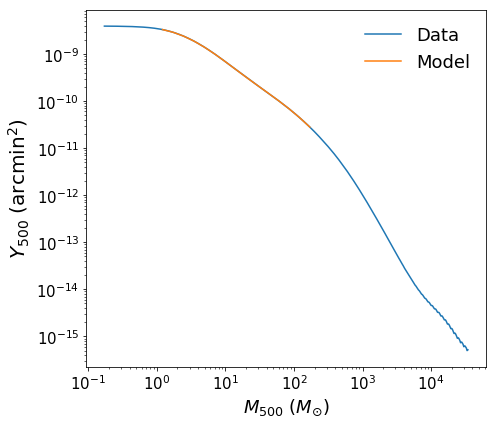

In [31]:
fig, ax = pl.subplots(1,1, figsize = (7,6))



ax.plot(theta_out_arcmin,  xiyk_out,label='Data')
ax.plot(theta,  wtheta_yk_acty3_beamed,label='Model')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M_{500}$ $(M_{\odot})$', size = 18)
ax.set_ylabel(r'$Y_{500}$ $(\rm{arcmin}^2)$', size = 20)
# ax.set_ylim(1e-18,1e-10)
# ax.set_xlim(2e-5,1e2)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()













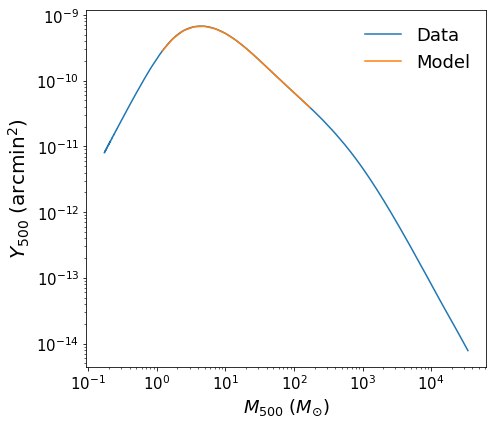

In [37]:
fig, ax = pl.subplots(1,1, figsize = (7,6))



ax.plot(theta_out_arcmin,  xigtyk_out,label='Data')
ax.plot(theta,  wtheta_ygt_acty3_beamed,label='Model')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M_{500}$ $(M_{\odot})$', size = 18)
ax.set_ylabel(r'$Y_{500}$ $(\rm{arcmin}^2)$', size = 20)
# ax.set_ylim(1e-18,1e-10)
# ax.set_xlim(2e-5,1e2)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()














In [4]:
fname = '/project/projectdirs/des/www/y3_cats/Y3_mastercat_12_3_19.h5'

cat = h5.File(fname, 'r')



In [5]:
sel = cat['index/maglim']['select'][()]


In [8]:
sel = cat['index/redmagic/combined_sample_fid/select'][()]
selr = cat['index/redmagic/combined_sample_fid/random_select'][()]



In [10]:
len(selr)*1.0/len(sel)



10.073281002003068

In [13]:
cat['randoms/redmagic/combined_sample_fid'].keys()



[u'dec', u'ra', u'weight', u'z']

In [9]:
cat['catalog/redmagic/combined_sample_fid'].keys()



[u'chisq',
 u'coadd_object_id',
 u'dec',
 u'lum',
 u'mag',
 u'mag_err',
 u'ra',
 u'refmag',
 u'refmag_err',
 u'weight',
 u'zredmagic',
 u'zredmagic_e',
 u'zredmagic_samp',
 u'zspec']

In [15]:
len(cat['randoms/redmagic/combined_sample_fid/ra'][()][selr])



26643244

In [10]:
cat['catalog']['maglim'].keys()



[u'dec', u'ra', u'weight']

In [13]:
cat['randoms']['maglim'].keys()



[u'dec', u'ra', u'weight', u'z']

In [31]:
raw = cat['randoms/maglim/ra'][()]
len(raw)



216968847

In [33]:
waw = cat['randoms/maglim/weight'][()]



In [35]:
np.max(waw)



0.0

In [18]:
zval = cat['catalog']['dnf']['unsheared']['zmean_sof'][()]
zval.shape


(399263026,)

In [19]:
ra = cat['catalog']['maglim']['ra'][()]
ra.shape



(399263026,)

In [20]:
w = cat['catalog']['maglim']['weight'][()]



In [21]:
np.mean(w)


0.61270577